# TOYOTA COROLLA DATASET
Using the above dataset to build a Model using  Linear Regression to predict the price of the vehicle. . 

## BUSINESS OBJECTIVE
* Maximize profits
* Minimize defects
* Maximize Market reach.
* Maximize service Quality

## CONSTRAINTS
* Cyber Attack
* Internet downtime 
* Understanding the market.  
* Inflation or Recession

## DATA DICTIONARY

| **slno** |      **Name of Feature**     | **Description**                                                          | **Type** | **Relevance** |
|:--------:|:----------------------------|:--------------------------------------------------------------------------|:--------:|:-------------:|
| 1 | Price     | Price of the vehicle              | Ratio    | Relevant      |
| 2 | 	Age_08_04| Age of the vehicle in months from the date of manufacturing to the 8th month of year2004 | Ratio    | Relevant      |
| 3 | KM     | Kilometer ran by the vehicle                | Ratio    | Relevant      |
| 4 | HP | Horsepower of the vehicle | Ratio    | Relevant      |
| 5 | cc     | The volume of the vehicle               | Ratio    | Relevant      |
| 6 | Doors | The number of doors in the vehicle  | Ratio    | Relevant      |
| 7 | Gears    | The number of gears in the vehicle               | Ratio    | Relevant      |
| 8 | Quarterly_Tax | The Quarterly-Tax of the vehicle.   | Ratio    | Relevant      |
| 9 | Weight    | Weight of the  vehicle                | Ratio    | Relevant      |


Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from sklearn.model_selection import train_test_split

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass22\ToyotaCorolla.csv",encoding='unicode_escape')
df1=df0.copy()
df1.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
df1.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [4]:
df=df1[['Price', 'Age_08_04','KM','HP','cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [6]:
df.shape

(1436, 9)

In [7]:
df.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [9]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


Checking the Number of Duplicates in the Dataset.

In [10]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  1


In [11]:
df.drop_duplicates(keep='first',inplace=True)
df.reset_index()
df.head()

C:\Users\lenny\AppData\Local\Temp\ipykernel_26328\4185642309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first',inplace=True)


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1435 non-null   int64
 1   Age_08_04      1435 non-null   int64
 2   KM             1435 non-null   int64
 3   HP             1435 non-null   int64
 4   cc             1435 non-null   int64
 5   Doors          1435 non-null   int64
 6   Gears          1435 non-null   int64
 7   Quarterly_Tax  1435 non-null   int64
 8   Weight         1435 non-null   int64
dtypes: int64(9)
memory usage: 112.1 KB


Checking the Number and Percentage of Missing Values in the Dataset.

In [13]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64


In [14]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Price             236
Age_08_04          77
KM               1263
HP                 12
cc                 13
Doors               4
Gears               4
Quarterly_Tax      13
Weight             59
dtype: int64


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [15]:
df.mean()

Price            10720.915679
Age_08_04           55.980488
KM               68571.782578
HP                 101.491986
cc                1576.560976
Doors                4.032753
Gears                5.026481
Quarterly_Tax       87.020209
Weight            1072.287108
dtype: float64

In [16]:
df.median()

Price             9900.0
Age_08_04           61.0
KM               63451.0
HP                 110.0
cc                1600.0
Doors                4.0
Gears                5.0
Quarterly_Tax       85.0
Weight            1070.0
dtype: float64

In [17]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_26328\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)


ModeResult(mode=array([[ 8950,    68, 36000,   110,  1600,     5,     5,    85,  1075]],
      dtype=int64), count=array([[ 109,   69,    9,  835,  845,  673, 1389,  613,  192]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [18]:
df.var()

Price            1.302295e+07
Age_08_04        3.445966e+02
KM               1.405582e+09
HP               2.244426e+02
cc               1.801048e+05
Doors            9.075737e-01
Gears            3.556048e-02
Quarterly_Tax    1.677688e+03
Weight           2.730259e+03
dtype: float64

In [19]:
df.std()

Price             3608.732978
Age_08_04           18.563312
KM               37491.094553
HP                  14.981408
cc                 424.387533
Doors                0.952667
Gears                0.188575
Quarterly_Tax       40.959588
Weight              52.251882
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [20]:
df.skew()

Price             1.696579
Age_08_04        -0.825567
KM                1.017023
HP                0.957833
cc               27.452196
Doors            -0.075056
Gears             2.282921
Quarterly_Tax     1.995336
Weight            3.116518
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [21]:
df.kurt()

Price              3.729769
Age_08_04         -0.076573
KM                 1.688525
HP                 8.845659
cc               931.434173
Doors             -1.874887
Gears             37.675443
Quarterly_Tax      4.329036
Weight            19.741527
dtype: float64

### GRAPHICAL REPRESENTATION

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


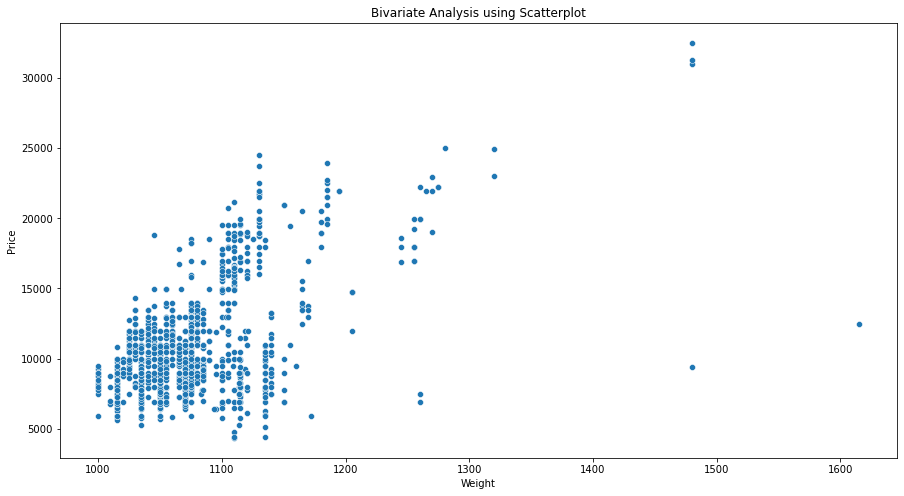

In [24]:
plt.figure(figsize=(15,8))
sns.scatterplot(df['Weight'],df['Price'])
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

From the scatterplot we can see that as the weight of the vehicle increases the price also increases. 

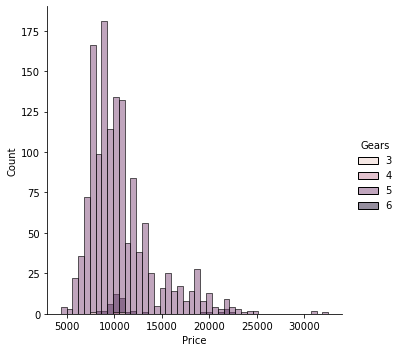

In [25]:
sns.displot(df, x="Price", hue="Gears")

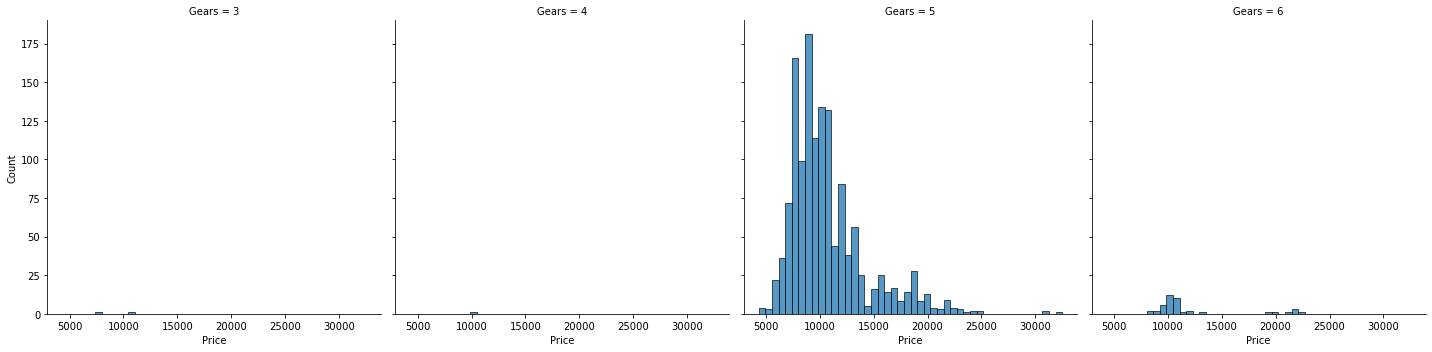

In [28]:
sns.displot(df, x="Price", col="Gears")

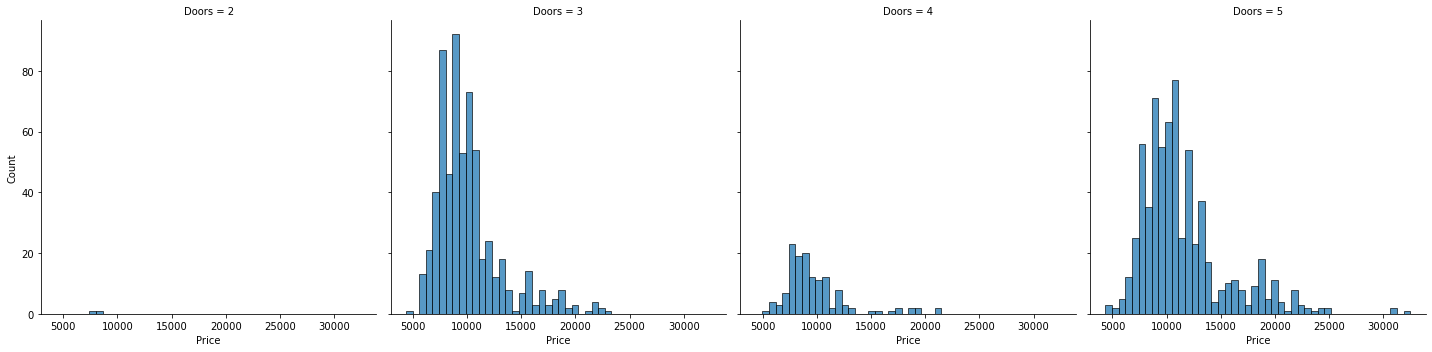

In [29]:
sns.displot(df, x="Price", col="Doors")

From the above plots we can see that 3 to 5 door vehicles are sold more whereas vehicle with gear 5 is the most sold vehicle. 

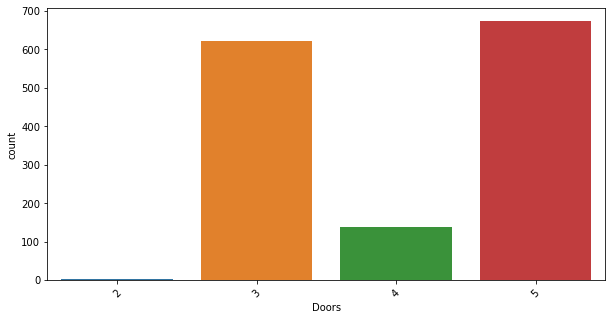

In [32]:
plt.figure(1, figsize=(10, 5))
sns.countplot(x=df["Doors"])
plt.xticks(rotation = 45)
plt.show()

In [30]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

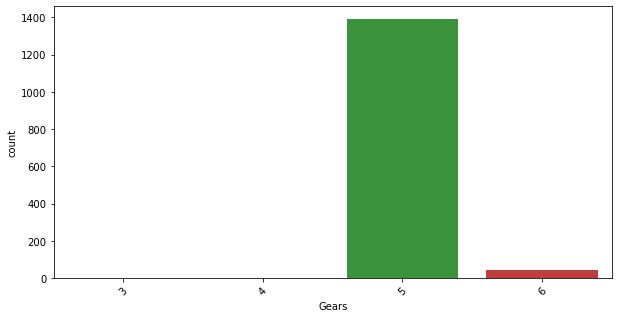

In [33]:
plt.figure(1, figsize=(10, 5))
sns.countplot(x=df["Gears"])
plt.xticks(rotation = 45)
plt.show()

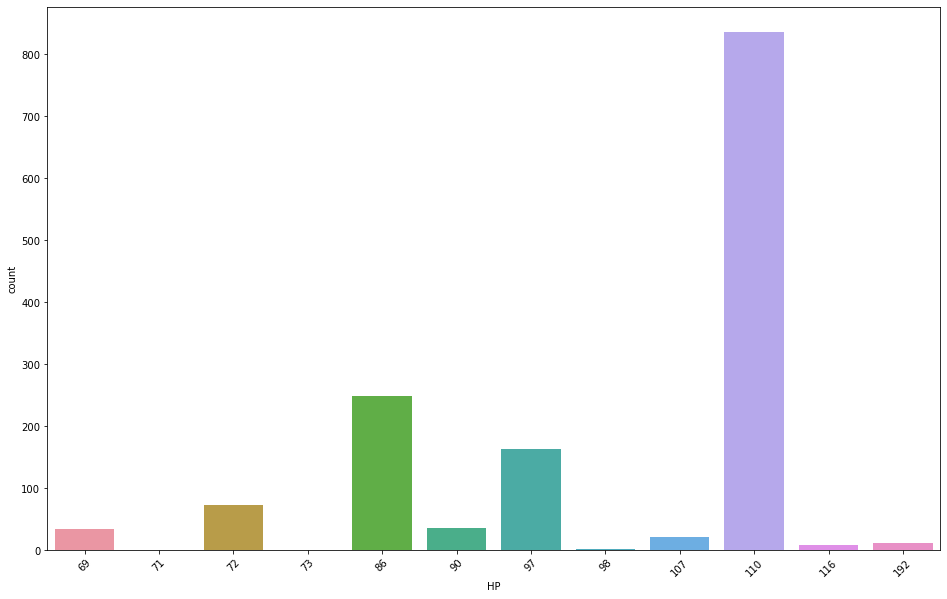

In [34]:
plt.figure(1, figsize=(16, 10))
sns.countplot(x=df["HP"])
plt.xticks(rotation = 45)
plt.show()

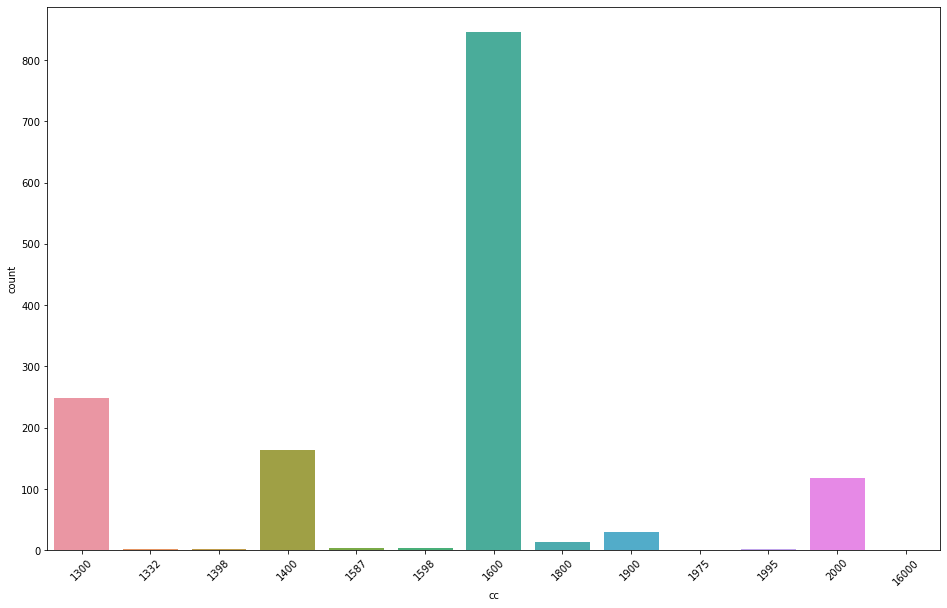

In [35]:
plt.figure(1, figsize=(16, 10))
sns.countplot(x=df["cc"])
plt.xticks(rotation = 45)
plt.show()

110 hp and 1600 cc vehicles are sold more as we can understand from the above given plots. 

Using the qq plot to understand the normal distribution of the dependent variable. Here the dependent variable is normally distributed but there is right skewness. 

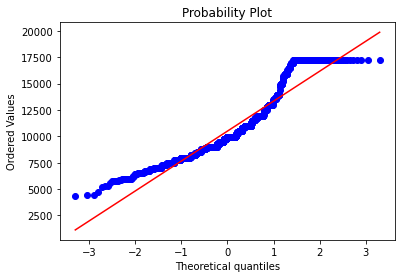

In [58]:
from scipy import stats
import pylab
stats.probplot(df['Price'], dist = "norm", plot = pylab)
plt.show()

Plotting boxplots of each variable.

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

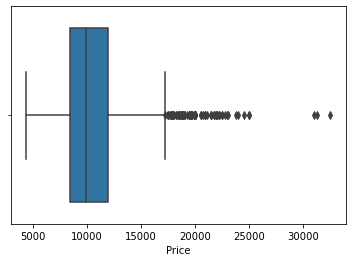

In [26]:
sns.boxplot(df["Price"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_08_04'>

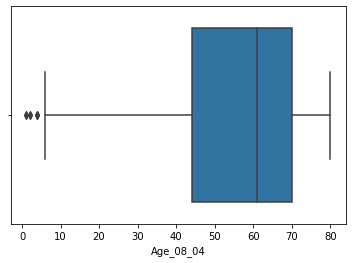

In [27]:
sns.boxplot(df['Age_08_04'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KM'>

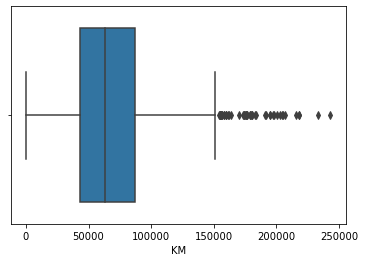

In [28]:
sns.boxplot(df['KM'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

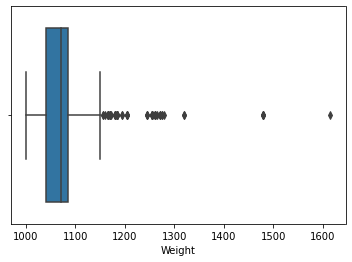

In [29]:
sns.boxplot(df['Weight'])

From the boxplots it is very evident that there are outliers in the dataset so using the below custom function calculated the number of outliers in each variable.

In [30]:
#Defining a custom function to get the number of outliers present as doing the steps again would just add extra lines 
def outlier_func(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [31]:
sum(outlier_func(df["Price"]))

109

In [32]:
sum(outlier_func(df['Age_08_04']))

7

In [33]:
sum(outlier_func(df["Quarterly_Tax"]))

223

In [34]:
sum(outlier_func(df["Weight"]))

65

In [35]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [36]:
from feature_engine.outliers import Winsorizer

In [37]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['Price'])

df['Price']= winsor.fit_transform(df[['Price']])
sum(outlier_func(df['Price']))

C:\Users\lenny\AppData\Local\Temp\ipykernel_26328\1613311524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']= winsor.fit_transform(df[['Price']])


0

In [38]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['Age_08_04'])

df['Age_08_04']= winsor.fit_transform(df[['Age_08_04']])
sum(outlier_func(df['Age_08_04']))

C:\Users\lenny\AppData\Local\Temp\ipykernel_26328\539394079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_08_04']= winsor.fit_transform(df[['Age_08_04']])


0

In [39]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['Quarterly_Tax'])

df['Quarterly_Tax']= winsor.fit_transform(df[['Quarterly_Tax']])
sum(outlier_func(df['Quarterly_Tax']))

C:\Users\lenny\AppData\Local\Temp\ipykernel_26328\541588171.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarterly_Tax']= winsor.fit_transform(df[['Quarterly_Tax']])


0

In [40]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['Weight'])

df['Weight']= winsor.fit_transform(df[['Weight']])
sum(outlier_func(df['Weight']))

C:\Users\lenny\AppData\Local\Temp\ipykernel_26328\447133023.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight']= winsor.fit_transform(df[['Weight']])


0

__CORRELATION CHART__

<AxesSubplot:>

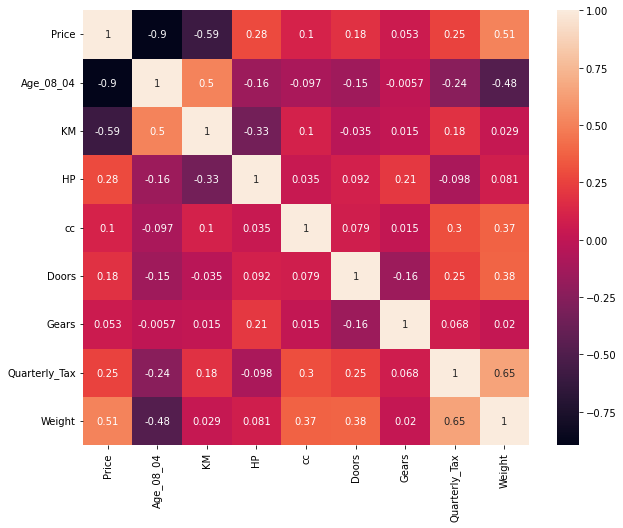

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

from the correlation chart it is clear that age of the vehicle has a very strong negative correlation with the price of the vehicle. 

#### MODEL BUILDING

Importing the library required for building the model. 

In [42]:
import statsmodels.formula.api as smf

__Simple Linear Regression__

Fitting the model

In [43]:
model= smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors+ Gears+ Quarterly_Tax + Weight', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1120.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        05:04:01   Log-Likelihood:                -12089.
No. Observations:                1435   AIC:                         2.420e+04
Df Residuals:                    1426   BIC:                         2.424e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -522.2567   1449.347     -0.360      0.719   -3365.337    2320.823
Age_08_04      -109.0768      2.239    -48.706      0.000    -113.470    -104.684
KM               -0.0185      0.001    -17.839      0.000      -0.020      -0.016
HP               16.8261      2.182      7.712      0.000      12.546      21.106
cc               -0.0878      0.075     -1.170      0.242      -0.235       0.059
Doors             4.2590     34.193      0.125      0.901     -62.815      71.333
Gears           467.2742    163.415      2.859      0.004     146.715     787.834
Quarterly_Tax     7.3764      2.721      2.711      0.007       2.038      12.714
Weight           12.9833      1.259     10.316      0.000      10.514      15.452
==============================================================================
Omnibus:                       79.683   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.375
Skew:                          -0.249   Prob(JB):                     6.97e-50
Kurtosis:                       4.881   Cond. No.                     3.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Some probability values of the coefficients are higher so checking the vif values and the influence plot to find ways to reduce the probability. 

__Checking for multicolinearity using VIF values, so that the multicolinear variables can be removed.__<br>
Note: Assumption- VIF > 10 = colinearity<br>
calculating VIF's values of independent variables

In [44]:
rsq_A = smf.ols('Age_08_04 ~ KM + HP + cc + Doors+ Gears+ Quarterly_Tax + Weight ', data = df).fit().rsquared  
vif_A = 1/(1 - rsq_A) 

In [45]:
rsq_KM  = smf.ols(' KM ~ Age_08_04 + HP + cc + Doors+ Gears+ Quarterly_Tax + Weight  ', data = df).fit().rsquared  
vif_KM   = 1/(1 - rsq_KM  ) 

In [46]:
rsq_HP = smf.ols('HP ~ Age_08_04 + KM + cc + Doors+ Gears+ Quarterly_Tax + Weight  ', data = df).fit().rsquared  
vif_HP = 1/(1 - rsq_HP) 

In [47]:
rsq_CC = smf.ols('cc ~  Age_08_04 + KM + HP  + Doors+ Gears+ Quarterly_Tax + Weight  ', data = df).fit().rsquared  
vif_CC = 1/(1 - rsq_CC) 

In [48]:
rsq_D = smf.ols('Doors ~  Age_08_04 + KM + HP + cc+ Gears+ Quarterly_Tax + Weight ', data = df).fit().rsquared  
vif_D = 1/(1 - rsq_D) 

In [49]:
rsq_G = smf.ols(' Gears ~  Age_08_04 + KM + HP + cc + Doors+ Quarterly_Tax + Weight ', data = df).fit().rsquared  
vif_G = 1/(1 - rsq_G) 

In [50]:
rsq_QT = smf.ols('Quarterly_Tax ~  Age_08_04 + KM + HP + cc + Doors+ Gears + Weight  ', data = df).fit().rsquared  
vif_QT = 1/(1 - rsq_QT) 

In [51]:
rsq_W = smf.ols('Weight ~  Age_08_04 + KM + HP + cc + Doors+ Gears+ Quarterly_Tax ', data = df).fit().rsquared  
vif_W = 1/(1 - rsq_W) 

In [68]:
# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04', 'KM', 'HP','cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight'], 'VIF':[vif_A, vif_KM, vif_HP,vif_CC, vif_D, vif_G, vif_QT, vif_W]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,2.017914
1,KM,1.764783
2,HP,1.252074
3,cc,1.189780
4,Doors,1.243425
5,Gears,1.112791
6,Quarterly_Tax,1.875240
7,Weight,2.641210


From the vif values there seems to be no issue as all the values are below 10 so going to check the influence plot. 

Importing the library required for plotting the influence plot

In [52]:
import statsmodels.api as sm

Plotting the influence plot, from which we can  see that row index number 80 has a very influential value. 

<Figure size 1080x576 with 0 Axes>

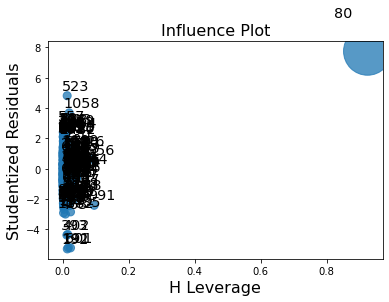

In [53]:
plt.figure(figsize=(15,8))
sm.graphics.influence_plot(model)
plt.show()

Dropping the row index 80 and again checking the model by fitting. 

In [54]:
df1= df.drop(df.index[[80]])

Again fitting the model.

In [55]:
model1= smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors+ Gears+ Quarterly_Tax + Weight', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1169.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        05:11:33   Log-Likelihood:                -12052.
No. Observations:                1434   AIC:                         2.412e+04
Df Residuals:                    1425   BIC:                         2.417e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5250.3425   1546.084     -3.396      0.001   -8283.187   -2217.498
Age_08_04      -106.1677      2.227    -47.682      0.000    -110.535    -101.800
KM               -0.0163      0.001    -15.496      0.000      -0.018      -0.014
HP               20.0198      2.178      9.193      0.000      15.748      24.291
cc               -2.0663      0.266     -7.769      0.000      -2.588      -1.545
Doors           -69.5565     34.838     -1.997      0.046    -137.897      -1.216
Gears           378.0024    160.555      2.354      0.019      63.053     692.952
Quarterly_Tax    12.0187      2.733      4.397      0.000       6.657      17.380
Weight           20.0676      1.536     13.066      0.000      17.055      23.080
==============================================================================
Omnibus:                       64.741   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.825
Skew:                          -0.123   Prob(JB):                     1.34e-42
Kurtosis:                       4.779   Cond. No.                     4.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The values we are concerned with are -<br>

* __R-squared/Ajusted R-squared__<br>
    R-squared value is 0.868. This shows that 86% of the variance in the dependent variable  can be explained by remaining relevant columns.<br>
* __F statistic  p value and its significance__<br>
    F statistic has a very low p value (practically low) Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.<br>
* __The coefficients and significance (p-values)__<br>
    The coefficients of the independent variables have a very low p-value closer to zero which means they are statistically significant.<br>

From the above values we can say that the fit is significant.<br>

__Checking the normal distribution of the residuals__

Normality of the residuals is an assumption of running a linear model. So, if our residuals are normal, it means that our assumption is valid and model inference should also be valid.Here the residual follows a normal distribution with slight skewness as seen in the below plot.

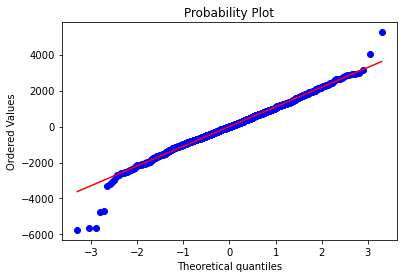

In [59]:
pred = model.predict(df)
res = model.resid
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

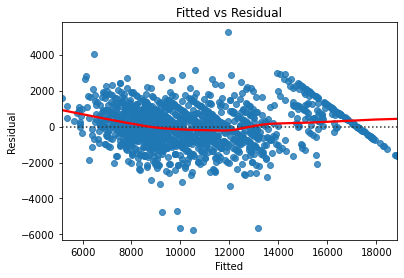

In [60]:
# Residuals vs Fitted plot
sns.residplot(x = pred, y = df.Price, lowess = True,line_kws=dict(color="r"))
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

* The residuals "bounce randomly" around the 0 line. This suggests that the assumption that the relationship is linear is reasonable.
* The residuals roughly form a "horizontal band" around the 0 line. This suggests that the variances of the error terms are equal.
* Some residuals "stands out" from the basic random pattern of residuals. This suggests that there are some outliers.

Splitting the dataset to check the rmse values for both the test and train dataset which will help us to understand how well the model works.

In [61]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df1, test_size = 0.3, random_state =457) 

In [62]:
# preparing the model on train data 
model_train = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors+ Gears+ Quarterly_Tax + Weight', data = df_train).fit()

In [63]:
# prediction on test data set 
test_pred = model_train.predict(df_test)

# test residual values 
test_resid = test_pred - df_test.Price
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

1096.5044998167577

In [64]:
# train_data prediction
train_pred = model_train.predict(df_train)

# train residual values 
train_resid  = train_pred - df_train.Price
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

1076.0615437954937

### CONCLUSION

This model is good for prediction as the r-square values is more than 0.85 and all the values are statistically significant. The rmse values are also similar so there is no overfitting. 